In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import firwin, freqz, lfilter


In [2]:
fs = 1024.0
numtaps = 2025  # N; group delay = (N-1)/2 = 1024 samples
delay = (numtaps - 1) // 2

# Bands (Hz): stop <1, pass 1–40, stop >40


# Design FIR (linear-phase, equiripple)
bh = firwin(numtaps, 1, fs=fs, pass_zero=False)

# Inspect frequency response (optional)
w, h = freqz(bh, worN=2048, fs=fs)

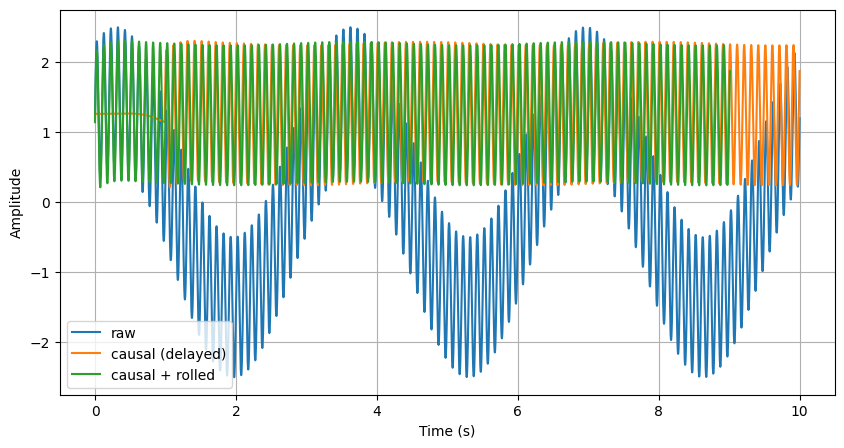

In [8]:
# Example signal x
t = np.arange(int(10*fs)) / fs
x = np.sin(2*np.pi*10*t) + 1.5*np.sin(2*np.pi*0.3*t+1) # 10 Hz + slow drift

# Causal filtering
first_x = x[0]
y = lfilter(bh, [1.0], x-first_x) + first_x

# Phase-delay correction by rolling
y_roll = np.roll(y, -delay)

# Handle the tail that got shifted left (set to NaN or zero, or trim)
y_roll[-delay:] = np.nan

# Plot
plt.figure(figsize=(10,5))
plt.plot(t, x, label='raw')
plt.plot(t, y, label='causal (delayed)')
plt.plot(t, y_roll, label='causal + rolled')
plt.legend(); plt.xlabel("Time (s)"); plt.ylabel("Amplitude"); plt.grid(True)
plt.show()